In [2]:
!pip install beautifulsoup4 pandas matplotlib seaborn

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://remoteok.io/remote-dev-jobs"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")


In [12]:
job_titles = []
companies = []
locations = []
skills = []

for job in soup.find_all("tr", class_="job"):
    title = job.find("h2", itemprop="title")
    company = job.find("h3", itemprop="name")
    skill_tags = job.find_all("div", class_="tag")

    if title and company:
        job_titles.append(title.get_text(strip=True))
        companies.append(company.get_text(strip=True))

        # Use data-region if available, else label as "Remote"
        location = job.get("data-region") or "Remote"
        locations.append(location)

        skill_list = [tag.get_text(strip=True) for tag in skill_tags]
        skills.append(", ".join(skill_list))


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 21)

In [5]:
import pandas as pd

df = pd.DataFrame({
    "Job Title": job_titles,
    "Company": companies,
    "Location": locations,
    "Skills": skills
})

df["Skill List"] = df["Skills"].apply(lambda x: x.split(", "))
df.head()


,Job Title,Company,Location,Skills,Skill List
0,WordPress Plugins & Themes developer,Melapress,Remote,"DevOps, Wordpress, PHP, JavaScript, Full Time,...","[DevOps, Wordpress, PHP, JavaScript, Full Time..."
1,Content Producer Technical Content Engineer Ju...,Private.Ki,Remote,"Other, Writer, Writing, Marketing","[Other, Writer, Writing, Marketing]"
2,Senior Full Stack Engineer,AMK Solutions,Remote,,[]
3,Backend Developer @ lobstr.io Python Scraping ...,lobstr.io,Remote,"Python, Backend, Redis, Remote, API, Tech Lead...","[Python, Backend, Redis, Remote, API, Tech Lea..."
4,Lead Data Engineer,Open Architects,Remote,"Engineer, DevOps, Python, Data, DataOps","[Engineer, DevOps, Python, Data, DataOps]"


In [6]:
df.to_csv("remoteok_jobs.csv", index=False)


In [7]:
from collections import Counter

# Flatten skill list
all_skills = [skill for sublist in df["Skill List"] for skill in sublist]
top_skills = Counter(all_skills).most_common(10)

print("Top 10 Most In-Demand Skills:")
for skill, count in top_skills:
    print(f"{skill}: {count}")


Top 10 Most In-Demand Skills:
Engineer: 9
JavaScript: 8
API: 6
Backend: 5
Full Stack: 4
DevOps: 3
Python: 3
Front End: 3
Typescript: 3
Senior: 3


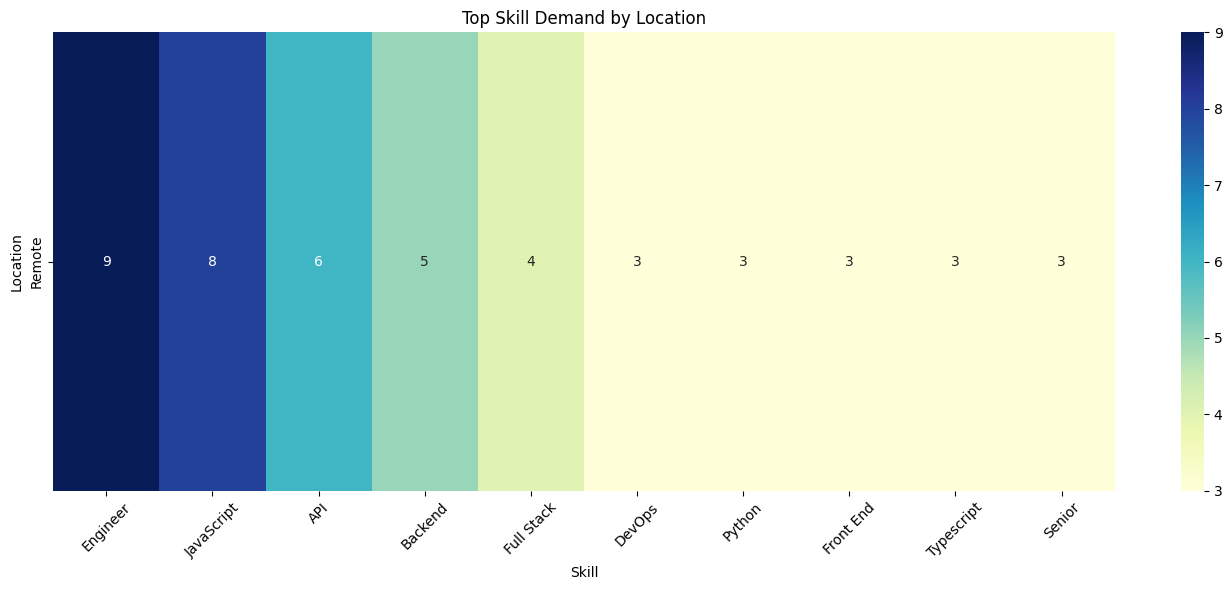

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

exploded = df.explode("Skill List")
heatmap_data = exploded.groupby("Location")["Skill List"].value_counts().unstack().fillna(0)

# Limit to top 10 skills overall
top_skill_names = [skill for skill, _ in top_skills]
heatmap_top = heatmap_data[top_skill_names]

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_top, cmap="YlGnBu", annot=True, fmt='.0f')
plt.title("Top Skill Demand by Location")
plt.ylabel("Location")
plt.xlabel("Skill")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Explode again for role-wise skill analysis
role_matrix = exploded.groupby("Job Title")["Skill List"].value_counts().unstack().fillna(0)

# Save to Excel (optional)
role_matrix.to_excel("Skill_vs_Role_Matrix.xlsx")


In [15]:
from google.colab import files

# Download the CSV
files.download("remoteok_jobs.csv")

# Download the Excel
files.download("Skill_vs_Role_Matrix.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>